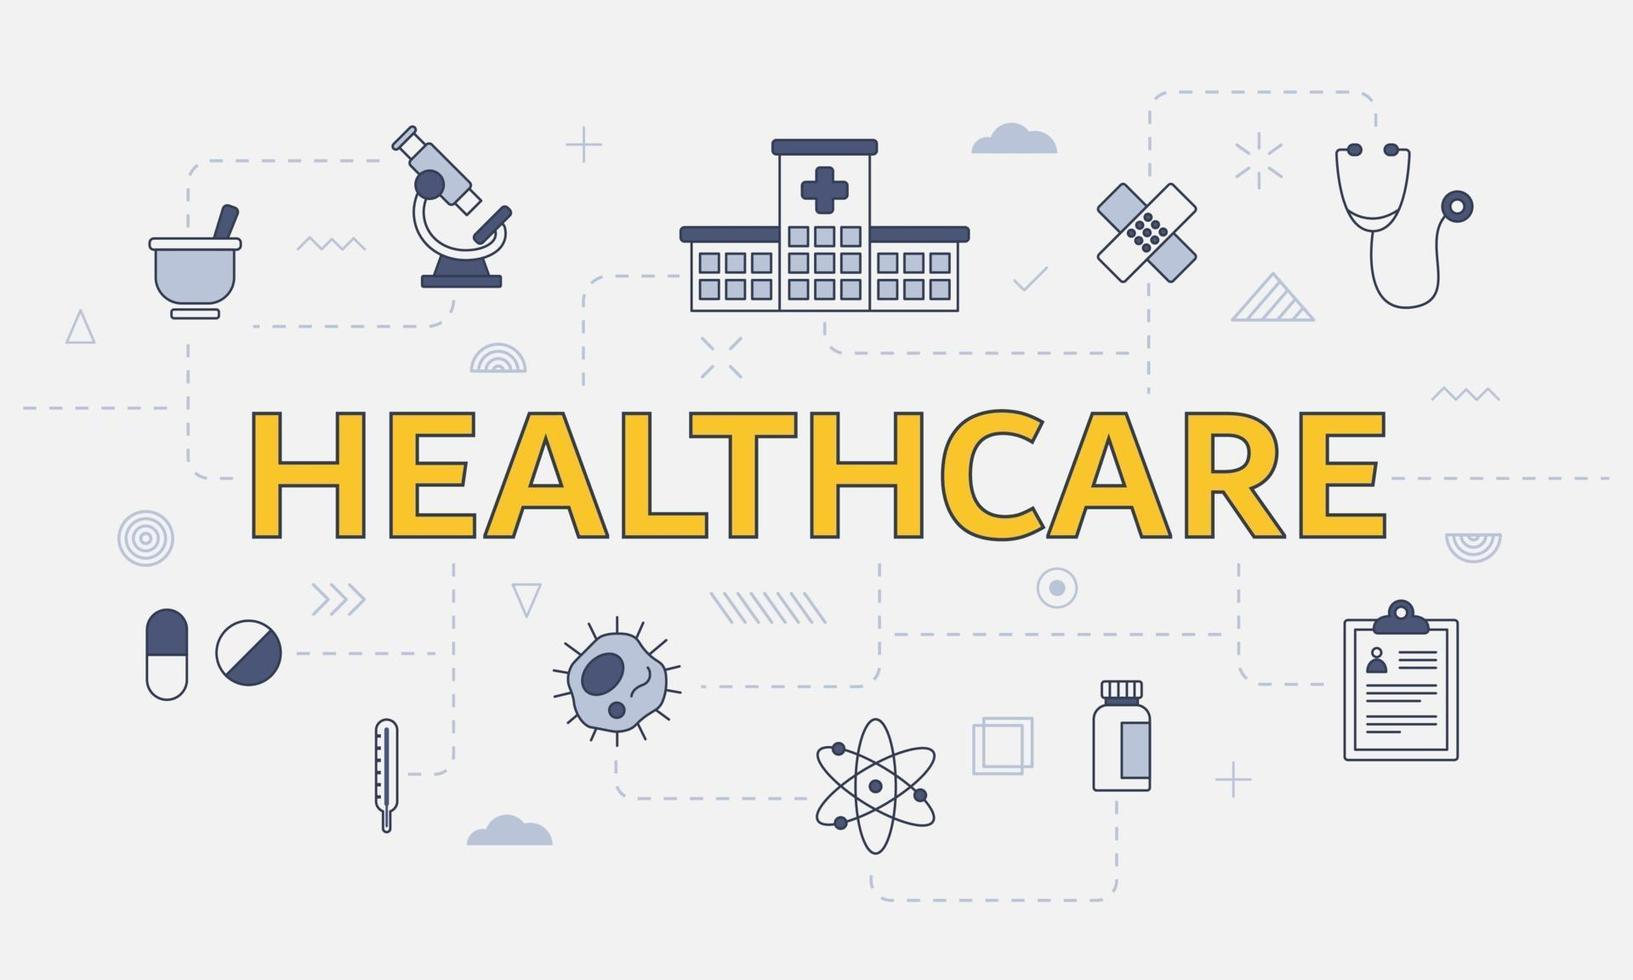

## **Dataset Features:**

-Disease: The name of the disease or medical condition under consideration.

-Fever: Indicates whether the patient has a fever (Yes/No).

-Cough: Indicates whether the patient has a cough (Yes/No).

-Fatigue: Indicates whether the patient experiences fatigue (Yes/No).

-Difficulty Breathing: Indicates whether the patient has difficulty breathing (Yes/No).

-Age: The age of the patient in years.

-Gender: The gender of the patient (Male/Female).

-Blood Pressure: The blood pressure level of the patient (Normal/High).

-Cholesterol Level: The cholesterol level of the patient (Normal/High).

-Outcome Variable: The outcome variable indicating the result of the diagnosis or assessment for the specific disease(Positive/Negative)

# Import the required Libraries

In [1]:
# Import necessary libraries for data analysis and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
# Read the dataset from a CSV file named "Disease_Diagnosis.csv"
df=pd.read_csv("Disease_Diagnosis.csv")
# Display the first few rows of the dataset to get an overview of the data
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
# Check the shape of the dataset to understand the number of rows and columns
df.shape

(349, 10)

# Data Preprocessing

In [5]:
# Renaming specific columns in the DataFrame for better readability and consistency.
df.rename(columns={'Difficulty Breathing':'Breathing Difficulty','Blood Pressure':'BP','Cholesterol Level':'Cholesterol',
                   'Outcome Variable':'Result'},inplace=True)

In [6]:
# Randomly sample 5 rows from the DataFrame to get a quick look at the data.
df.sample(5)

,Disease,Fever,Cough,Fatigue,Breathing Difficulty,Age,Gender,BP,Cholesterol,Result
243,Bronchitis,No,No,Yes,Yes,55,Male,High,High,Negative
106,Anxiety Disorders,Yes,No,Yes,Yes,38,Male,High,High,Positive
338,Stroke,No,Yes,No,No,70,Male,Normal,High,Positive
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
128,Chickenpox,No,Yes,No,No,40,Male,Normal,High,Positive


In [7]:
# Check and count the number of missing (null) values in each column of the DataFrame.
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Breathing Difficulty    0
Age                     0
Gender                  0
BP                      0
Cholesterol             0
Result                  0
dtype: int64

In [8]:
# Check and count the number of duplicate rows in the DataFrame.
df[df.duplicated()].count()

Disease                 49
Fever                   49
Cough                   49
Fatigue                 49
Breathing Difficulty    49
Age                     49
Gender                  49
BP                      49
Cholesterol             49
Result                  49
dtype: int64

In [9]:
# Remove duplicate rows from the DataFrame, keeping the first occurrence and dropping subsequent duplicates.
df = df.drop_duplicates(keep='first')

In [10]:
# After removing duplicates, check and count the number of duplicate rows in the DataFrame again.
df[df.duplicated()]

,Disease,Fever,Cough,Fatigue,Breathing Difficulty,Age,Gender,BP,Cholesterol,Result


# Data Understanding and Exploration

In [11]:
# Display an overview of the DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               300 non-null    object
 1   Fever                 300 non-null    object
 2   Cough                 300 non-null    object
 3   Fatigue               300 non-null    object
 4   Breathing Difficulty  300 non-null    object
 5   Age                   300 non-null    int64 
 6   Gender                300 non-null    object
 7   BP                    300 non-null    object
 8   Cholesterol           300 non-null    object
 9   Result                300 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.8+ KB


In [12]:
# Generate statistical summary information for the DataFrame, transposed for readability.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,300.0,45.756667,12.596548,19.0,35.0,45.0,55.0,90.0


In [13]:
# Retrieve the unique values in the 'Disease' column.
df['Disease'].unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


# EDA

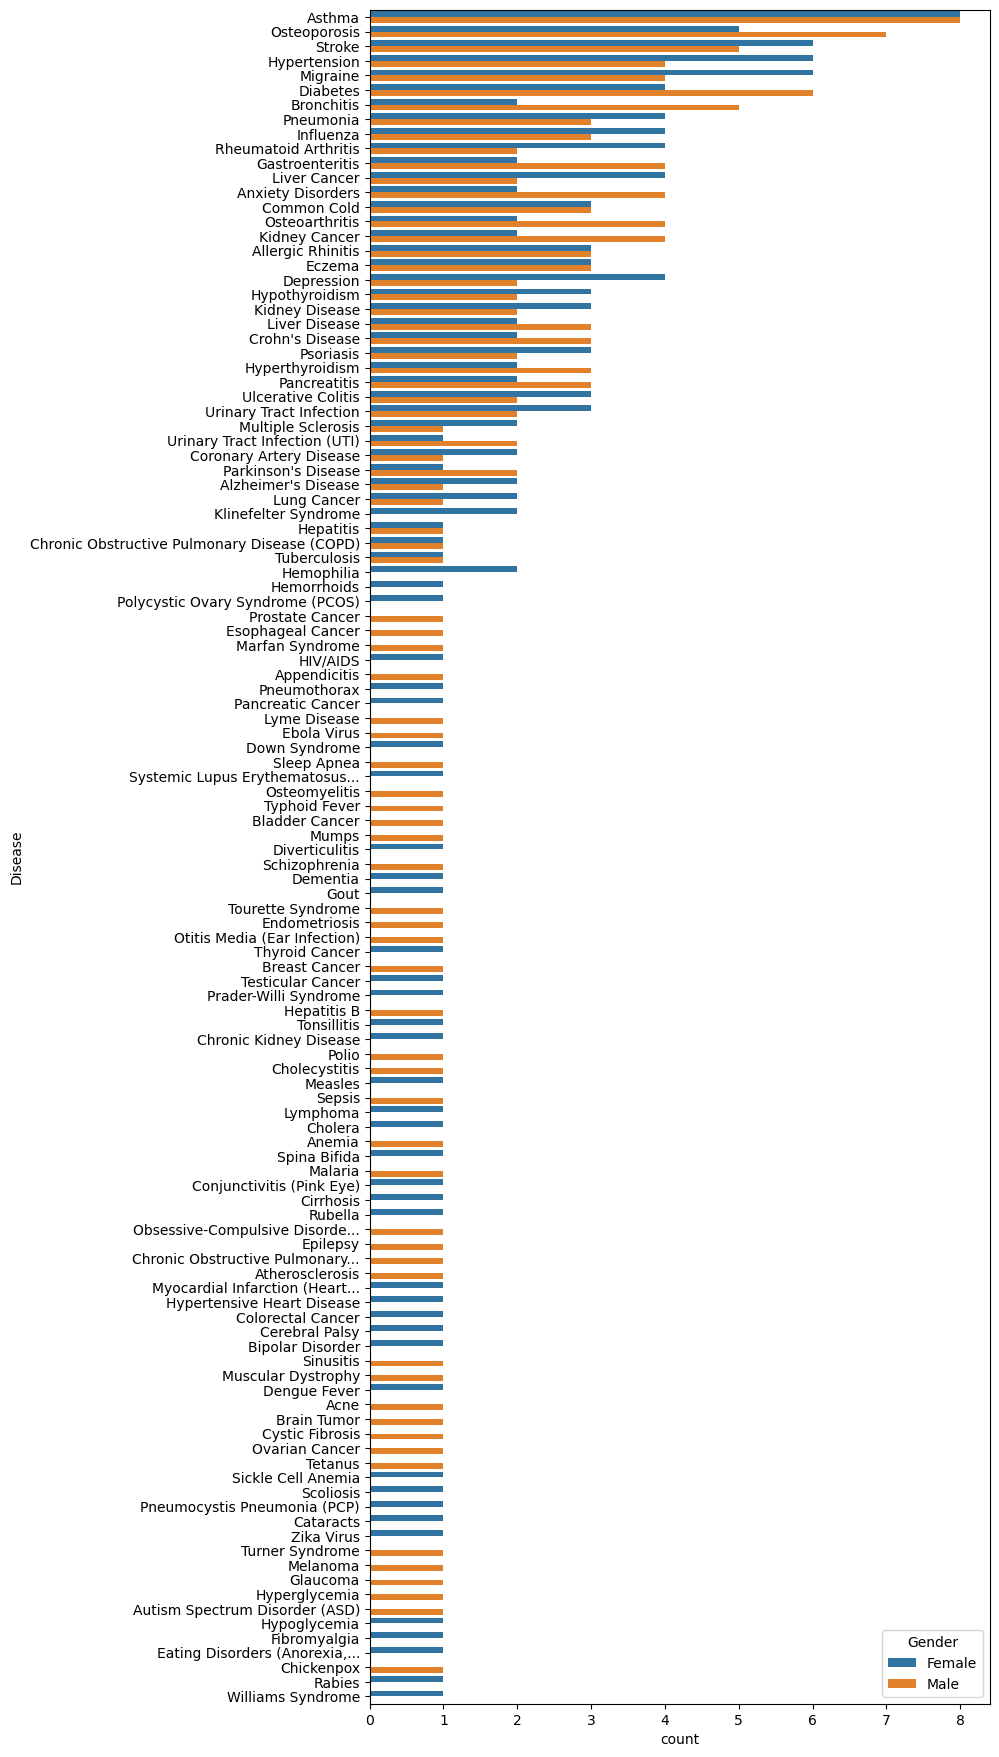

In [14]:
# Set the figure size for the plot.
plt.figure(figsize=(8,22))
# Create the count plot.
sns.countplot(y=df['Disease'],hue=df['Gender'],order=df.Disease.value_counts().index)
# Display the plot.
plt.show()

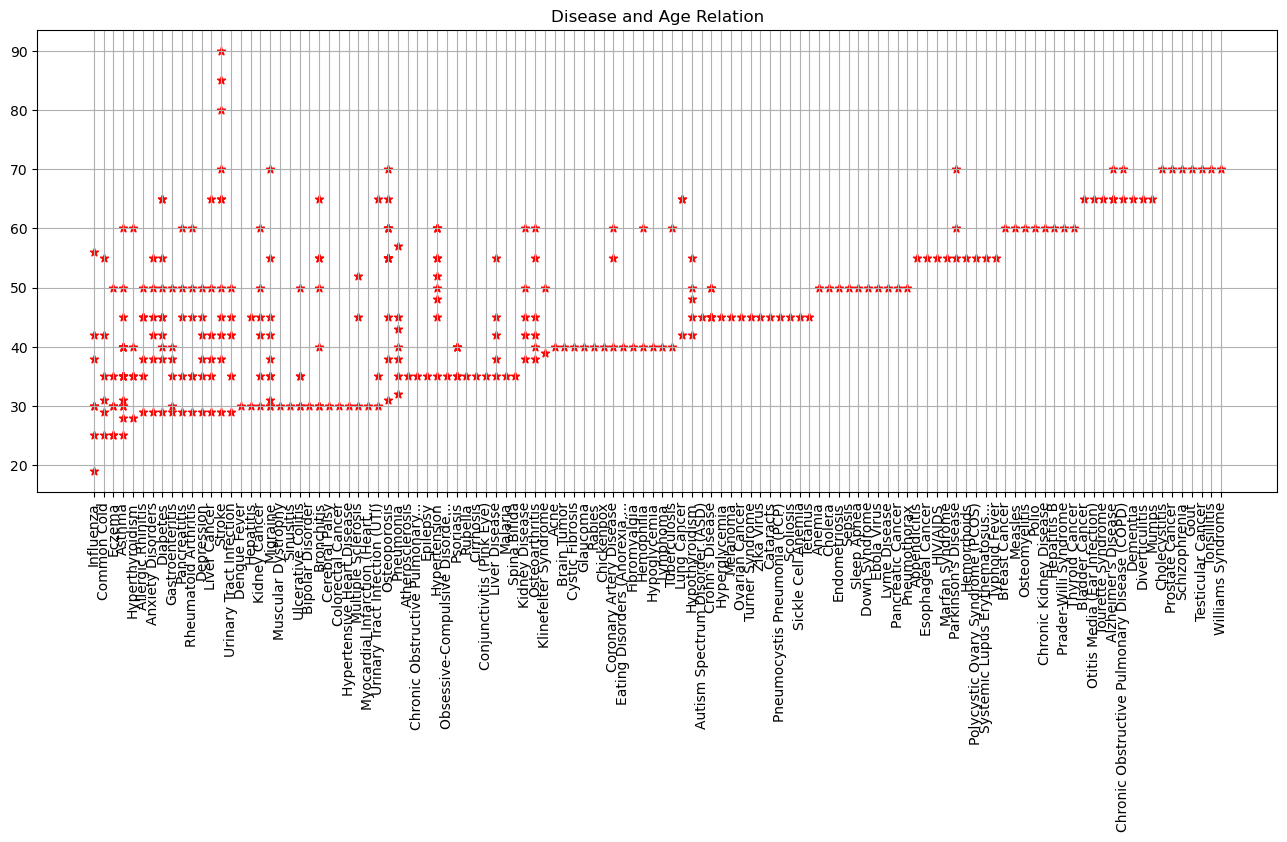

In [15]:
# Set the figure size for the plot.
plt.figure(figsize=(16,6))
# Create a scatter plot of the 'Disease' column
plt.scatter(df['Disease'],df['Age'],color='r',marker='*')
# Rotate the x-axis labels by 90 degrees for better readability.
plt.xticks(rotation=90)
# Set the title of the plot to "Disease and Age Relation."
plt.title("Disease and Age Relation")
# Display a grid on the plot to aid in reading values.
plt.grid()
# Display the plot.
plt.show()

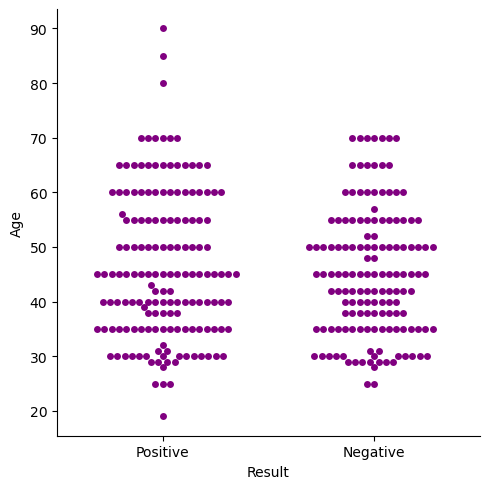

In [16]:
# Create a swarm plot using Seaborn's catplot function
sns.catplot(x='Result',y ='Age',data = df,kind="swarm",color='purple')
# Display the created swarm plot
plt.show()

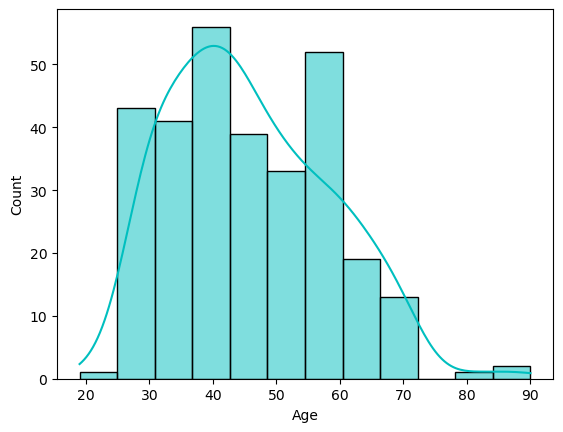

In [17]:
# Create a histogram
sns.histplot(df['Age'],bins='auto',color='c',kde=True)
# Display the histogram plot.
plt.show()

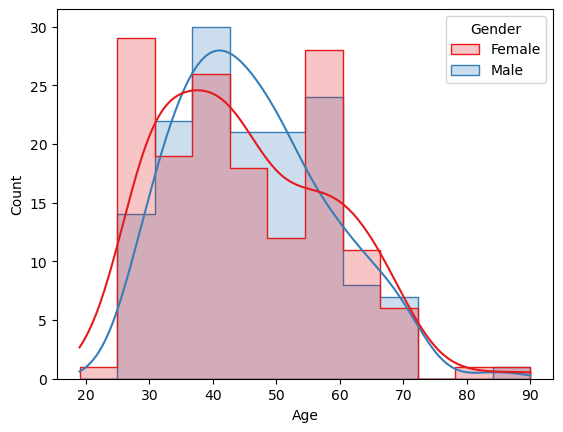

In [18]:
# Create a histogram
sns.histplot(data=df,x='Age',bins='auto',hue='Gender',element='step',common_norm=False,palette='Set1',kde=True)
# Display the histogram plot.
plt.show()

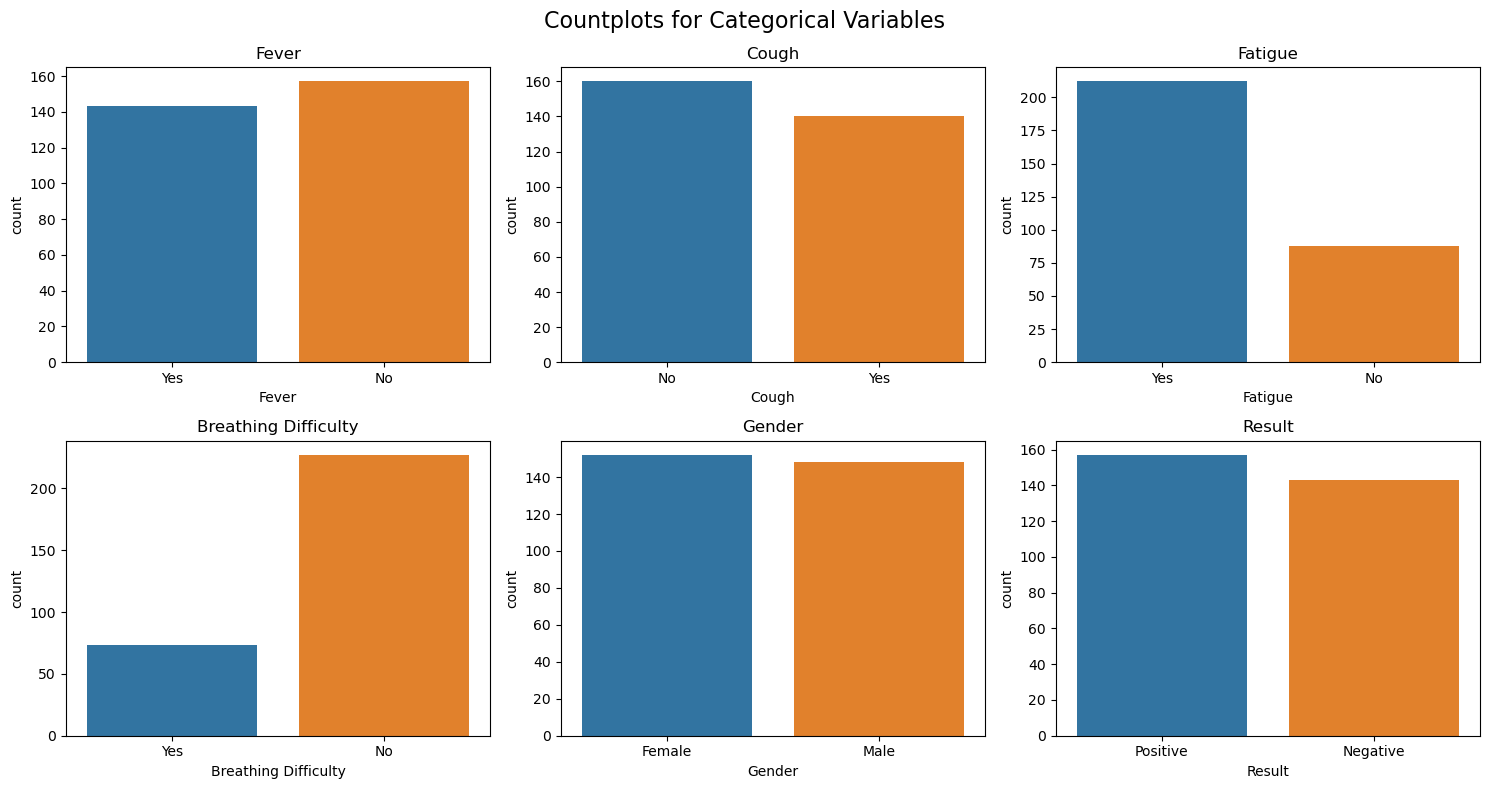

In [19]:
# Define the list of categorical columns to be visualized
columns_to_plot = ['Fever','Cough','Fatigue','Breathing Difficulty','Gender','Result']
# Set the figure size for the plot.
plt.figure(figsize=(15, 8))
# Loop through each column in 'columns_to_plot' and create a countplot for each
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
# Set the title for the entire figure
plt.suptitle('Countplots for Categorical Variables', fontsize=16)
# Adjust the layout and spacing of the subplots for better presentation
plt.tight_layout()
# Display the figure with all the countplots
plt.show()

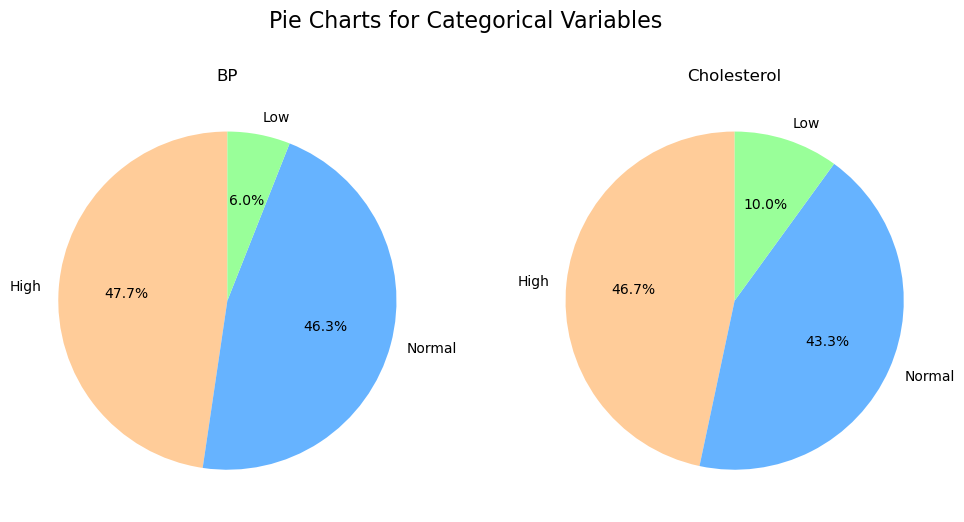

In [20]:
# Define the list of columns to create pie charts for
columns_to_plot = ['BP','Cholesterol']
# Set the figure size for the plot.
plt.figure(figsize=(12, 6))
# Loop through the specified columns to create individual pie charts
for i, col in enumerate(columns_to_plot, 1):
    counts = df[col].value_counts()
    plt.subplot(1, 2, i)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#66b3ff', '#99ff99'])
    plt.title(col)
# Set a common title for the set of pie charts
plt.suptitle('Pie Charts for Categorical Variables', fontsize=16)
# Display the pie charts
plt.show()

# Transforming Categorical Data into Numerical Format

In [21]:
# Convert 'Fever', 'Cough', 'Fatigue', and 'Breathing Difficulty' columns from 'Yes' and 'No' to 1 and 0.
for i in ['Fever','Cough','Fatigue','Breathing Difficulty']:
    df[i]=df[i].replace({'Yes':1,'No':0})

In [22]:
# Convert 'BP' and 'Cholesterol' columns from 'Low', 'Normal', and 'High' to 1, 2, and 3.
for i in ['BP','Cholesterol']:
    df[i]=df[i].replace({'Low':1,'Normal':2,'High':3})

In [23]:
# Convert 'Result' column from 'Positive' and 'Negative' to 1 and 0.
df['Result']=df['Result'].replace({'Positive':1,'Negative':0})
# Convert 'Gender' column from 'Male' and 'Female' to 1 and 0.
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

## Encoding Categorical Data

In [24]:
# Create a LabelEncoder and encode the 'Disease' column.
le=LabelEncoder()
df['Disease']=le.fit_transform(df['Disease'])

In [25]:
# Display the first few rows of the DataFrame.
df.head()

,Disease,Fever,Cough,Fatigue,Breathing Difficulty,Age,Gender,BP,Cholesterol,Result
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
5,37,1,0,0,0,25,0,2,2,1


In [26]:
# Display statistics about the 'Disease' column.
df['Disease'].describe()

count    300.000000
mean      55.336667
std       32.661996
min        0.000000
25%       29.750000
50%       56.000000
75%       81.000000
max      115.000000
Name: Disease, dtype: float64

# Correlation Matrix

In [27]:
# Calculate the correlation between columns in the DataFrame.
df.corr()

,Disease,Fever,Cough,Fatigue,Breathing Difficulty,Age,Gender,BP,Cholesterol,Result
Disease,1.000000,0.023099,0.047511,0.014062,-0.175479,0.147927,-0.060488,0.087529,-0.018042,0.039327
Fever,0.023099,1.000000,0.164099,-0.074075,0.252019,-0.004884,0.059448,0.226142,-0.024702,0.175894
Cough,0.047511,0.164099,1.000000,-0.131100,0.201388,-0.074348,-0.040984,-0.025874,-0.033877,-0.030323
Fatigue,0.014062,-0.074075,-0.131100,1.000000,0.075302,0.108629,0.035341,0.214664,0.047514,0.191344
Breathing Difficulty,-0.175479,0.252019,0.201388,0.075302,1.000000,-0.178670,0.093021,-0.018264,-0.103587,0.074605
Age,0.147927,-0.004884,-0.074348,0.108629,-0.178670,1.000000,0.037650,0.149313,0.119650,0.051587
Gender,-0.060488,0.059448,-0.040984,0.035341,0.093021,0.037650,1.000000,0.047949,-0.053411,-0.219637
BP,0.087529,0.226142,-0.025874,0.214664,-0.018264,0.149313,0.047949,1.000000,0.346405,0.261217
Cholesterol,-0.018042,-0.024702,-0.033877,0.047514,-0.103587,0.119650,-0.053411,0.346405,1.000000,0.329246
Result,0.039327,0.175894,-0.030323,0.191344,0.074605,0.051587,-0.219637,0.261217,0.329246,1.000000


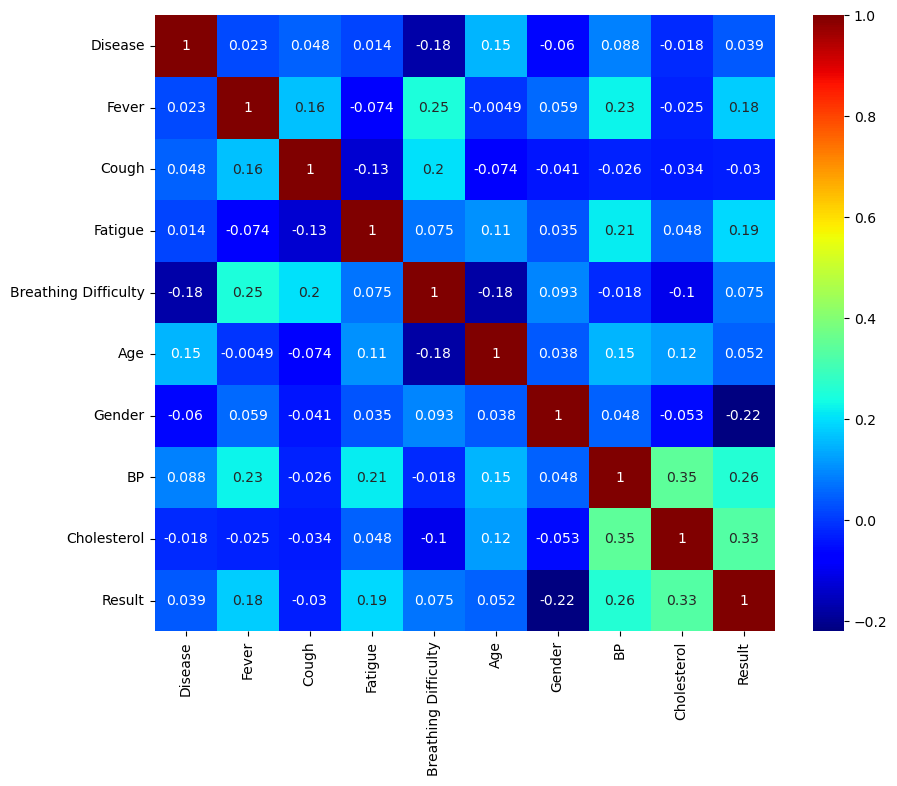

In [28]:
# Create a heatmap to visualize the correlations between columns.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='jet')
plt.show()

# Data Splitting and Train Test Split

In [29]:
# Extract the features (independent variables) by removing the 'Result' column from the DataFrame
x=df.drop('Result',axis=1)
# Display the first 5 rows of the feature dataset
x.head()

,Disease,Fever,Cough,Fatigue,Breathing Difficulty,Age,Gender,BP,Cholesterol
0,56,1,0,1,1,19,0,1,2
1,24,0,1,1,0,25,0,2,2
2,37,0,1,1,0,25,0,2,2
3,6,1,1,0,1,25,1,2,2
5,37,1,0,0,0,25,0,2,2


In [30]:
# Extract the target variable 'Result' from the DataFrame, showing the first 10 rows
y=df['Result']
y[:10]

0     1
1     0
2     0
3     1
5     1
6     1
8     0
10    1
11    0
12    0
Name: Result, dtype: int64

In [31]:
# Split the dataset into training and testing sets, with 80% of the data for training and 20% for testing.
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Training

In [32]:
# Create a Random Forest Classifier with specified hyperparameters.
rfc=RandomForestClassifier(n_estimators=400,criterion="log_loss",max_depth=9,max_features="sqrt")
# Train the Random Forest Classifier on the training data
rfc.fit(xtrain,ytrain)

RandomForestClassifier(criterion='log_loss', max_depth=9, n_estimators=400)

In [33]:
# Use the trained classifier to make predictions on the test dataset
pred=rfc.predict(xtest)
pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

# Model Evaluation

In [34]:
train=rfc.score(xtrain,ytrain)
test=rfc.score(xtest,ytest)
print("Training Score:",train)
print("Testing Score:",test)

Training Score: 1.0
Testing Score: 0.7333333333333333


In [35]:
accuracy = accuracy_score(ytest,pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('-+-+'*20)
cm=confusion_matrix(ytest,pred)
print("Confusion Matrix:\n",cm)
print('-+-+'*20)
cr=classification_report(ytest,pred)
print("Classification Report:\n\n",cr)
print('-+-+'*20)

Accuracy: 73.33%
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Confusion Matrix:
 [[16 11]
 [ 5 28]]
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Classification Report:

               precision    recall  f1-score   support

           0       0.76      0.59      0.67        27
           1       0.72      0.85      0.78        33

    accuracy                           0.73        60
   macro avg       0.74      0.72      0.72        60
weighted avg       0.74      0.73      0.73        60

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


# Model Saving and Loading:

In [36]:
import joblib
# Save the model to a file
joblib.dump(rfc,'Healthcare_Disease_Diagnosis.joblib')

['Healthcare_Disease_Diagnosis.joblib']

In [37]:
# Save the LabelEncoder to a file 
joblib.dump(le, 'disease_label_encoder.joblib')

['disease_label_encoder.joblib']

In [38]:
# Load the trained Random Foreset model
rfc_model = joblib.load('Healthcare_Disease_Diagnosis.joblib')

In [39]:
# Load the 'Disease' LabelEncoder
disease_label_encoder = joblib.load('disease_label_encoder.joblib')

# Accepting User Input and Making Predictions for New Data

In [40]:
# Create a reverse mapping of label encoding for 'Disease'
reverse_disease_mapping = {val: label for label, val in enumerate(disease_label_encoder.classes_)}

# Get the patient's name from the user
patient_name = input("Enter Patient's Name: ")

print("Please enter the following values for the Diagnosis:")

# Get user input for disease (by label, which you'll map to the actual disease name)
Disease = int(input("Disease Register No from 0 to 115: "))
if Disease in reverse_disease_mapping.values():
    # Check if Disease is in the values of the reverse mapping
    for key, value in reverse_disease_mapping.items():
        if value == Disease:
            disease_name = key
            print('Disease:',disease_name)
            break
else:
    print('Invalid Disease')
    exit()

Age = int(input("Age: "))
Gender = int(input("Gender (Male:1, Female:0): "))
Fever = int(input("Fever (Yes:1, No:0): "))
Cough = int(input("Cough (Yes:1, No:0): "))
Fatigue = int(input("Fatigue (Yes:1, No:0): "))
Breathing_Difficulty = int(input("Breathing Difficulty (Yes:1, No:0): "))
BP = int(input("BP (Low:1, Normal:2, High:3): "))
Cholesterol = int(input("Cholesterol (Low:1, Normal:2, High:3): "))

# Create a DataFrame from user input
Diagnosis = [[Disease,Age,Gender,Fever,Cough,Fatigue,Breathing_Difficulty,BP,Cholesterol]]

# Make a prediction using the loaded model
prediction = rfc_model.predict(Diagnosis)

# Map the prediction to 'Positive' or 'Negative'
diagnosis_result = "Positive" if prediction == 1 else "Negative"

# Display the final output with the Disease Name
print('----'*30)
print("  Diagnosis Report:")
print('----'*30)
print(f"  Patient Name:{patient_name} | Gender:{'Male' if Gender == 1 else 'Female'} | Age:{Age} | Disease Name:{disease_name} | Diagnosis Result:{diagnosis_result}")
print('----'*30)

Enter Patient's Name: Rahul
Please enter the following values for the Diagnosis:
Disease Register No from 0 to 115: 50
Disease: Hyperglycemia
Age: 34
Gender (Male:1, Female:0): 1
Fever (Yes:1, No:0): 1
Cough (Yes:1, No:0): 0
Fatigue (Yes:1, No:0): 1
Breathing Difficulty (Yes:1, No:0): 0
BP (Low:1, Normal:2, High:3): 2
Cholesterol (Low:1, Normal:2, High:3): 1
------------------------------------------------------------------------------------------------------------------------
  Diagnosis Report:
------------------------------------------------------------------------------------------------------------------------
  Patient Name:Rahul | Gender:Male | Age:34 | Disease Name:Hyperglycemia | Diagnosis Result:Negative
------------------------------------------------------------------------------------------------------------------------
